### Pipeline for analyzing input data

The idea is to simply input the folder containing the processed data and then run a bunch of functions from plotting.py to plot the data and also display and save tables of the input data that can be useful for analysis and for the report. The plotted data should be saved and displayed and so should the tables.

This should deal exlusively with input data while the output data is analyzed in the notebook analyze_results.ipynb

In [69]:
# Import python modules
import os
import sys
import pandas as pd

# Determine the absolute path to the src directory (one level up from notebooks)
module_path = os.path.abspath(os.path.join("..", "src"))
if module_path not in sys.path:
    sys.path.append(module_path)

In [70]:
# Import custom modules
import plotting
import utils

In [71]:
SAVE_FIGURES = False
SAVE_TABLES = False

In [72]:
PROCESSED_DATA_FOLDER = os.path.join(os.path.dirname(os.getcwd()), "data", "processed")
data_folder_name = "elec_s_128_all"
data_folder = os.path.join(PROCESSED_DATA_FOLDER, data_folder_name)
output_folder = os.path.join(data_folder, "analyzed_data")
if not os.path.exists(output_folder):
    if SAVE_FIGURES or SAVE_TABLES:
        os.makedirs(output_folder)
demand_output_folder = (
    None if not SAVE_FIGURES else os.path.join(output_folder, "demand")
)
if SAVE_FIGURES or SAVE_TABLES:
    if not os.path.exists(demand_output_folder):
        os.makedirs(demand_output_folder)
capacity_factors_output_folder = (
    None if not SAVE_FIGURES else os.path.join(output_folder, "capacity_factors")
)
if SAVE_FIGURES or SAVE_TABLES:
    if not os.path.exists(capacity_factors_output_folder):
        os.makedirs(capacity_factors_output_folder)

In [73]:
# read data
(
    batteries,
    branches,
    capacity_factors,
    generators,
    generator_costs,
    hourly_demand,
    nodes,
) = utils.load_csv_files_from_folder(data_folder).values()

## Grid Overview

In [74]:
savefolder = None

In [75]:
buses = nodes.copy()
lines = branches.copy()

In [76]:
from shapely.geometry import Polygon, MultiPolygon
import geopandas as gpd

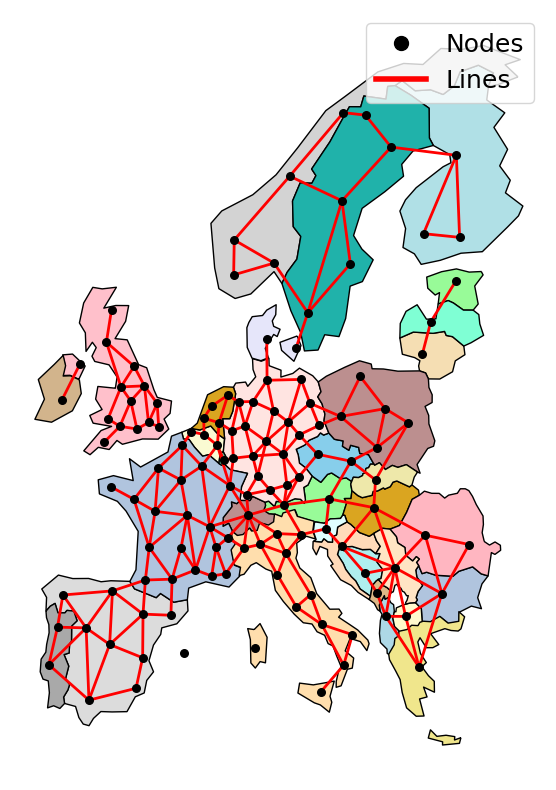

Plotting grid simple


In [77]:
import calendar
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import LineString
import matplotlib.lines as mlines
from matplotlib.collections import LineCollection
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString
import seaborn as sns
from shapely.geometry import Polygon

"""Links can be links or lines"""
# Convert Iberia_busesA
# DataFrame to a GeoDataFrame
geometry_buses = gpd.points_from_xy(buses["x"], buses["y"])
gdf_buses = gpd.GeoDataFrame(buses, geometry=geometry_buses, crs="EPSG:4326")

# Create a dictionary to map bus IDs to their coordinates for easy access
bus_coords = gdf_buses[["x", "y"]].to_dict("index")

# Generate LineString geometries based on the coordinates of bus0 and bus1 in the lines DataFrame
line_geometries = []
for _, row in lines.iterrows():
    if row["bus0"] in bus_coords and row["bus1"] in bus_coords:
        point0 = (bus_coords[row["bus0"]]["x"], bus_coords[row["bus0"]]["y"])
        point1 = (bus_coords[row["bus1"]]["x"], bus_coords[row["bus1"]]["y"])
        line_geometries.append(LineString([point0, point1]))
    else:
        print(f"Excluded line with missing bus coordinates: {row}")

# Create a GeoDataFrame for the lines
gdf_lines = gpd.GeoDataFrame(lines, geometry=line_geometries, crs="EPSG:4326")

fig, ax = plotting.plot_background(nodes)

# # Plot buses and lines
gdf_buses.plot(
    ax=ax, color="black", marker="o", markersize=30, zorder=20
)  # Plot buses with increased size
if not gdf_lines.empty:
    gdf_lines.plot(
        ax=ax, color="red", linewidth=2, zorder=15
    )  # Plot transmission lines
# Create custom legend elements with thicker lines and larger font size
legend_elements = [
    mlines.Line2D(
        [0],
        [0],
        marker="o",
        color="black",
        label="Nodes",
        markersize=10,
        linestyle="None",
    ),
    mlines.Line2D([0], [0], color="red", linewidth=4, label="Lines"),
]

# Add the custom legend with increased font size
ax.legend(handles=legend_elements, loc="upper right", fontsize=18)

# Customize the plot
plt.xlabel("Longitude")
plt.ylabel("Latitude")
ax.set_axis_off()
plt.grid(True)
plt.show()
print(f"Plotting grid simple")

if savefolder:
    savepath = os.path.join(savefolder, "grid_simple.png")
    fig.savefig(savepath, bbox_inches="tight")

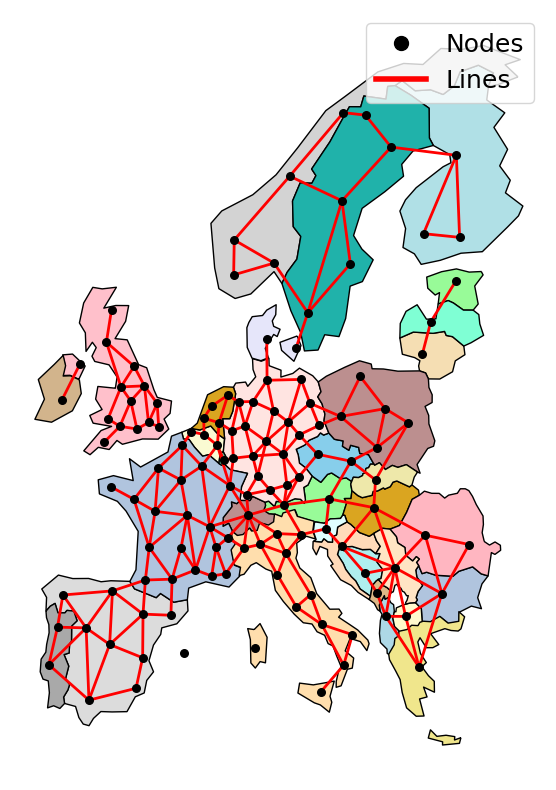

Plotting grid simple


In [78]:
plotting.plot_buses_and_lines(nodes, branches)

Excluded city with missing bus coordinates: Murcia
Excluded city with missing bus coordinates: Bilbao
Excluded city with missing bus coordinates: Zaragoza
Excluded city with missing bus coordinates: Seville
Excluded city with missing bus coordinates: Lugo
Excluded city with missing bus coordinates: Madrid
Excluded city with missing bus coordinates: Valencia
Excluded city with missing bus coordinates: Salamanca
Excluded city with missing bus coordinates: Barcelona
Excluded city with missing bus coordinates: Porto
Excluded city with missing bus coordinates: Lisbon
Plotting grid with line IDs and city text


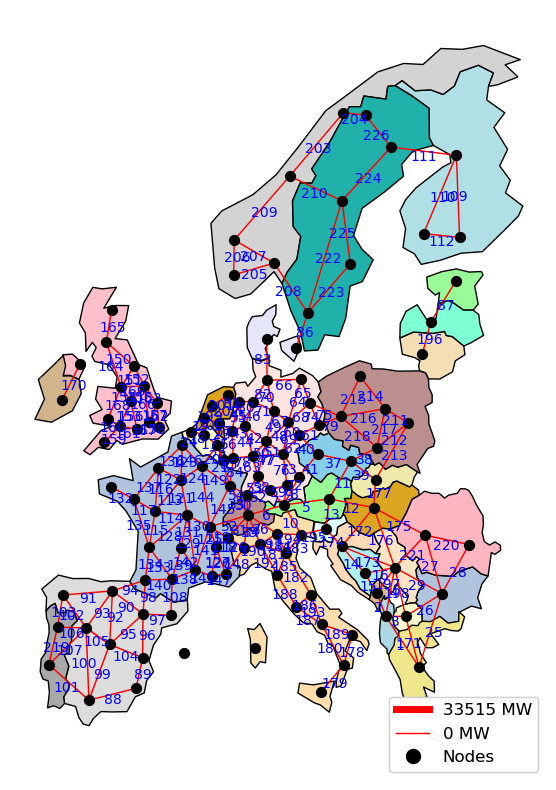

In [79]:
plotting.plot_base_network_with_lineIDs_and_city_text(nodes, branches)

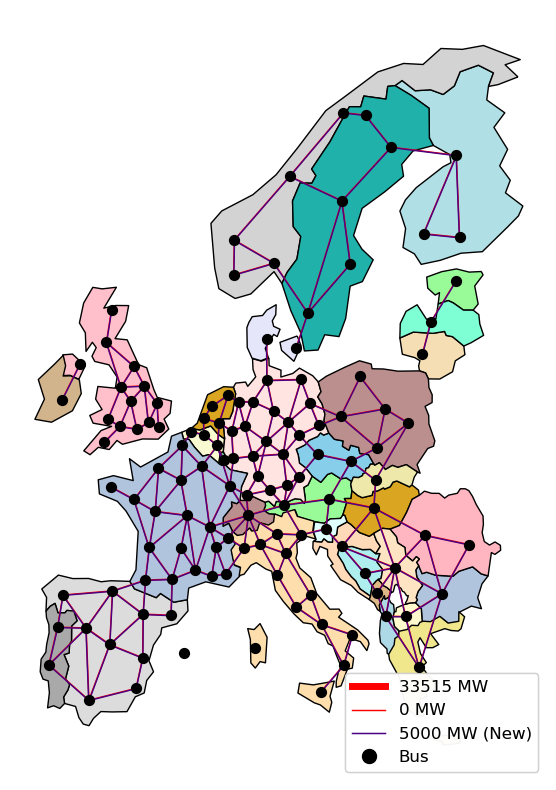

Transmission lines with additional capacity potential of 5000 MW


In [80]:
plotting.plot_sized_lines_with_extensions(
    nodes,
    branches,
)

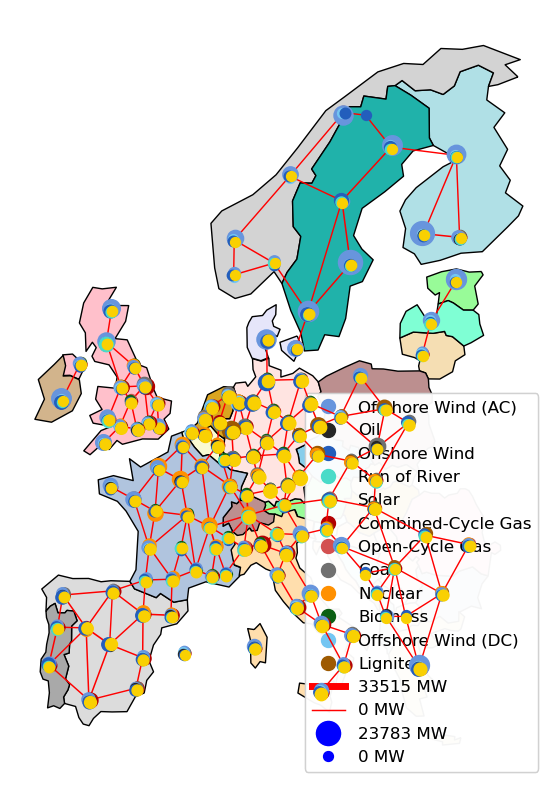

Plotting grid sized generators and lines


In [81]:
plotting.plot_sized_generators_and_lines(
    nodes,
    branches,
    generators,
)

### Transmission Lines

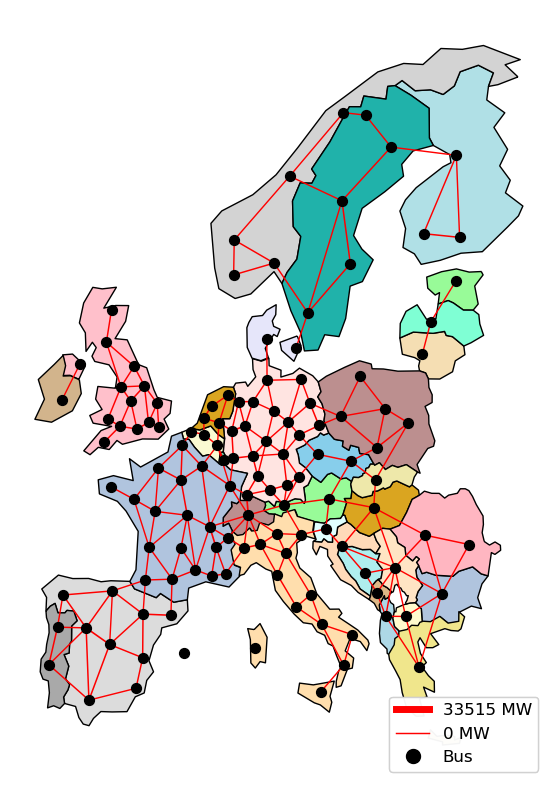

Plotting grid sized branches


In [82]:
plotting.plot_sized_branches(
    nodes,
    branches,
)

In [83]:
plotting.get_branches_overview_table(
    branches,
)

### Demand 

Average daily demand [GWh per day] per area


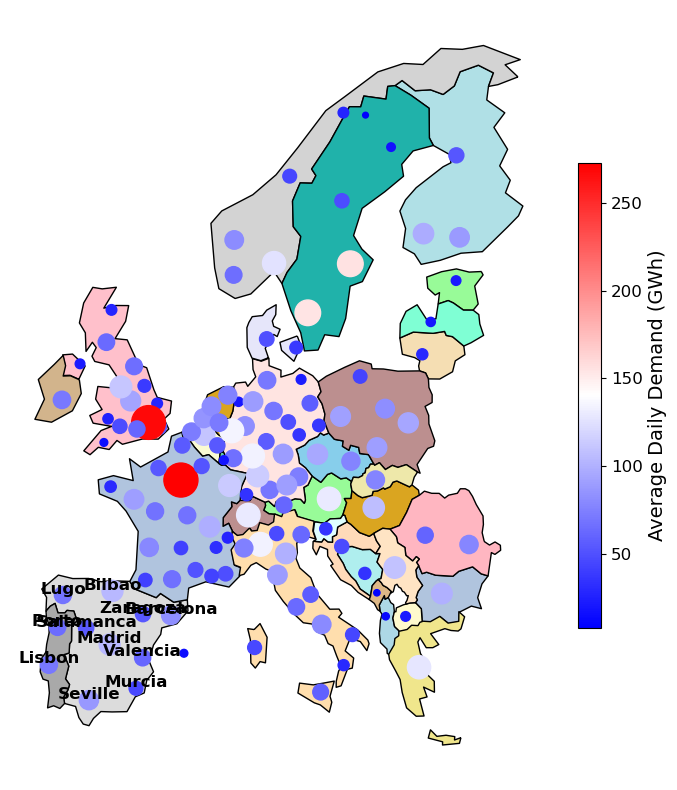

In [84]:
plotting.plot_demand_network_daily(
    nodes,
    hourly_demand,
)

Average hourly demand [MWh/h] per area


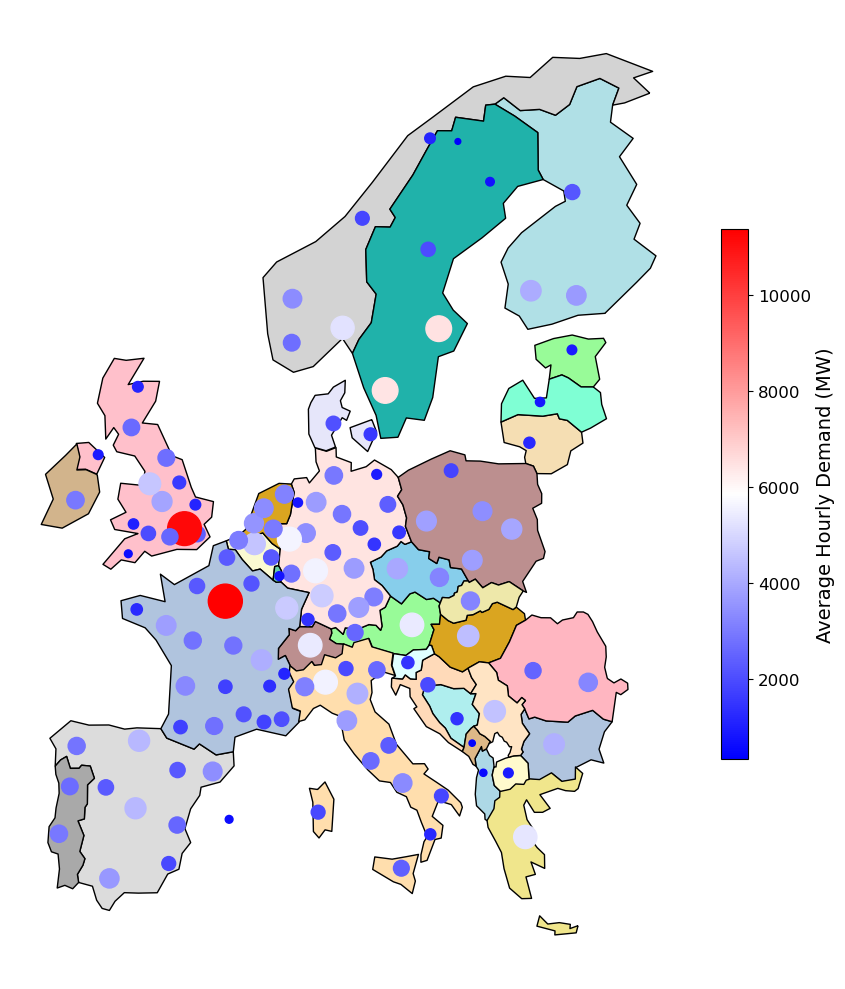

In [85]:
plotting.plot_demand_network_hourly(
    nodes,
    hourly_demand,
)

Normalized Average Hourly Load for per country


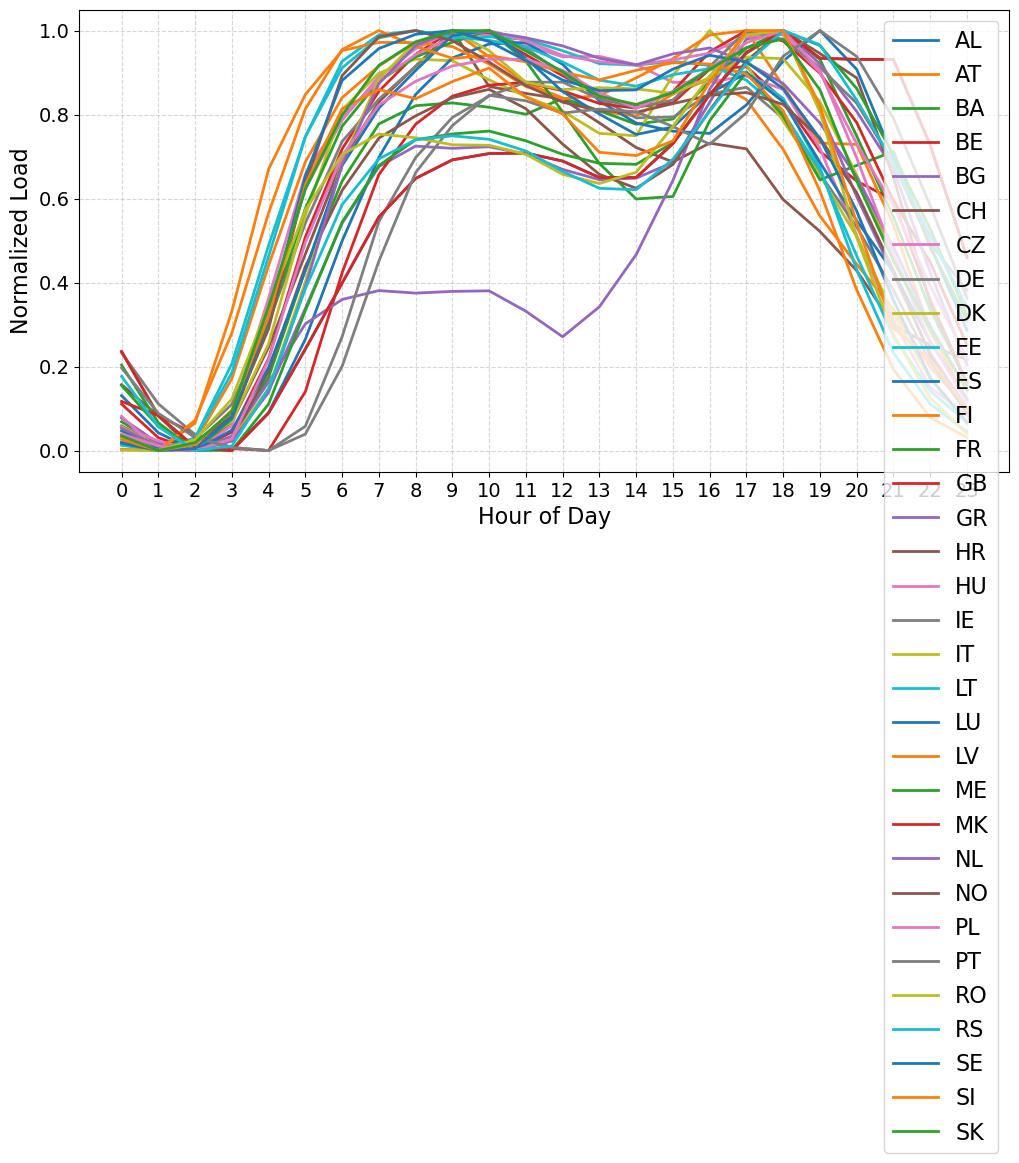

In [86]:
plotting.plot_normalized_hourly_load_by_country(nodes, hourly_demand)

Average Hourly Demand with Standard Deviation


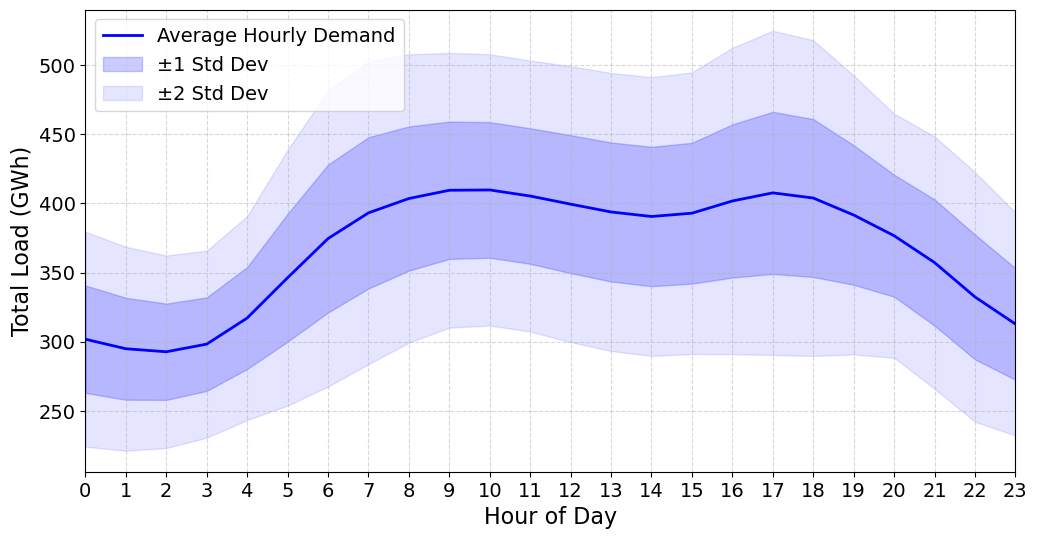

In [87]:
plotting.plot_aggregated_average_hourly_demand_with_stds(
    hourly_demand,
)

Average hourly load per month all demand nodes


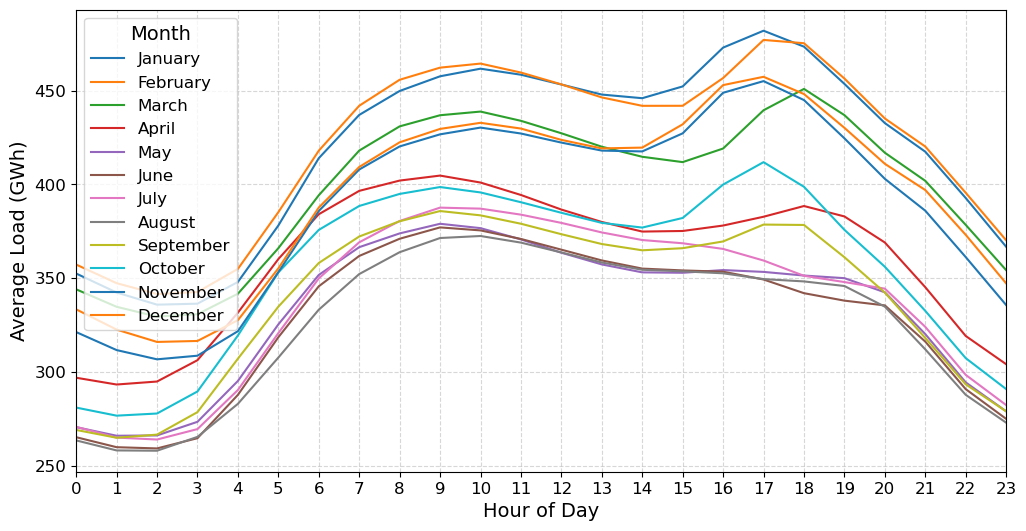

In [88]:
plotting.plot_average_hourly_demand_each_month_aggragated(
    hourly_demand,
)

In [89]:
# plotting.plot_average_hourly_demand_each_month_at_node(
#     hourly_demand,
#     plotting.city_to_node["Bilbao"],
#     savefolder=demand_output_folder,
# )

Average hourly load per season all demand nodes


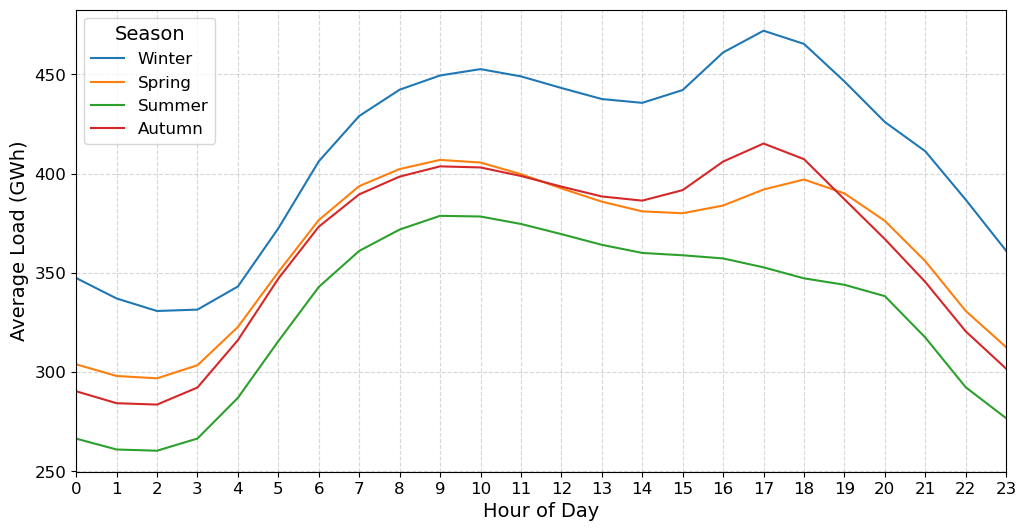

In [90]:
plotting.plot_average_hourly_demand_each_season_aggragated(
    hourly_demand,
)

### Generators Tables

In [91]:
plotting.get_generators_overview_table(generators)

Installed Capacity [MW]  Number of Generators
carrier                                                  
CCGT                  184314.161000                   104
OCGT                   13736.634932                    60
biomass                21288.691976                    70
coal                   63868.165361                    50
lignite                45428.642753                    21
nuclear               110054.100000                    37
offwind-ac            363137.702527                    81
offwind-dc             15421.868429                    57
oil                     5596.560390                    30
onwind                184646.174706                   128
ror                    49417.590917                    81
solar                 152969.743087                   126

In [92]:
plotting.get_generators_cost_and_emissions_table(generators)

Marginal Cost (€/MWh)  CO2 Emissions (ton/MWh)  \
carrier                                                      
CCGT                    40.793567                     0.20   
OCGT                    54.364776                     0.20   
biomass                 14.893617                     0.00   
coal                    27.961996                     0.34   
lignite                 12.031416                     0.41   
nuclear                 11.378788                     0.00   
offwind-ac               0.015000                     0.00   
offwind-dc               0.015000                     0.00   
oil                    146.273236                     0.26   
onwind                   0.015000                     0.00   
ror                      0.000000                     0.00   
solar                    0.010000                     0.00   

            Annualized Investment Cost (€/MW)  CO2 Cost (€/MWh)  \
carrier                                                           
CCGT                             99027.729293             17.00   
OCGT                             45095.441515             17.00   
biomass                         278083.065356              0.00   
coal                            349976.553630             28.90   
lignite                         349976.553630             34.85   
nuclear                         706772.616769              0.00   
offwind-ac                      188647.961894              0.00   
offwind-dc                      211730.010723              0.00   
oil                              37870.807407             22.10   
onwind                           96085.888020              0.00   
ror                             299140.224929              0.00   
solar                            35602.071244              0.00   

            Total Marginal Cost (€/MWh)  
carrier                                  
CCGT                          57.793567  
OCGT                          71.364776  
biomass                       14.893617  
coal                          56.861996  
lignite                       46.881416  
nuclear                       11.378788  
offwind-ac                     0.015000  
offwind-dc                     0.015000  
oil                          168.373236  
onwind                         0.015000  
ror                            0.000000  
solar                          0.010000

### Generators Plots

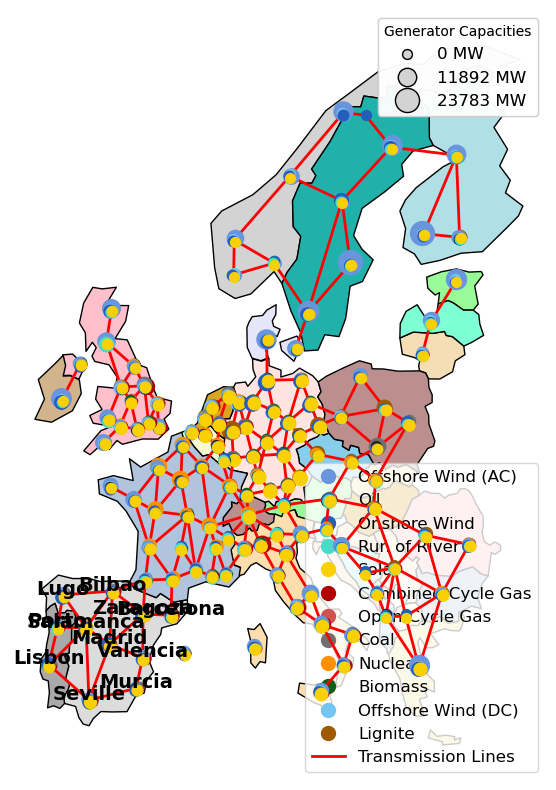

Plotting grid sized generators


In [93]:
plotting.plot_sized_generators(nodes, branches, generators)

Generators by city and type installed capacity (nominal) in GW


<Figure size 1800x900 with 0 Axes>

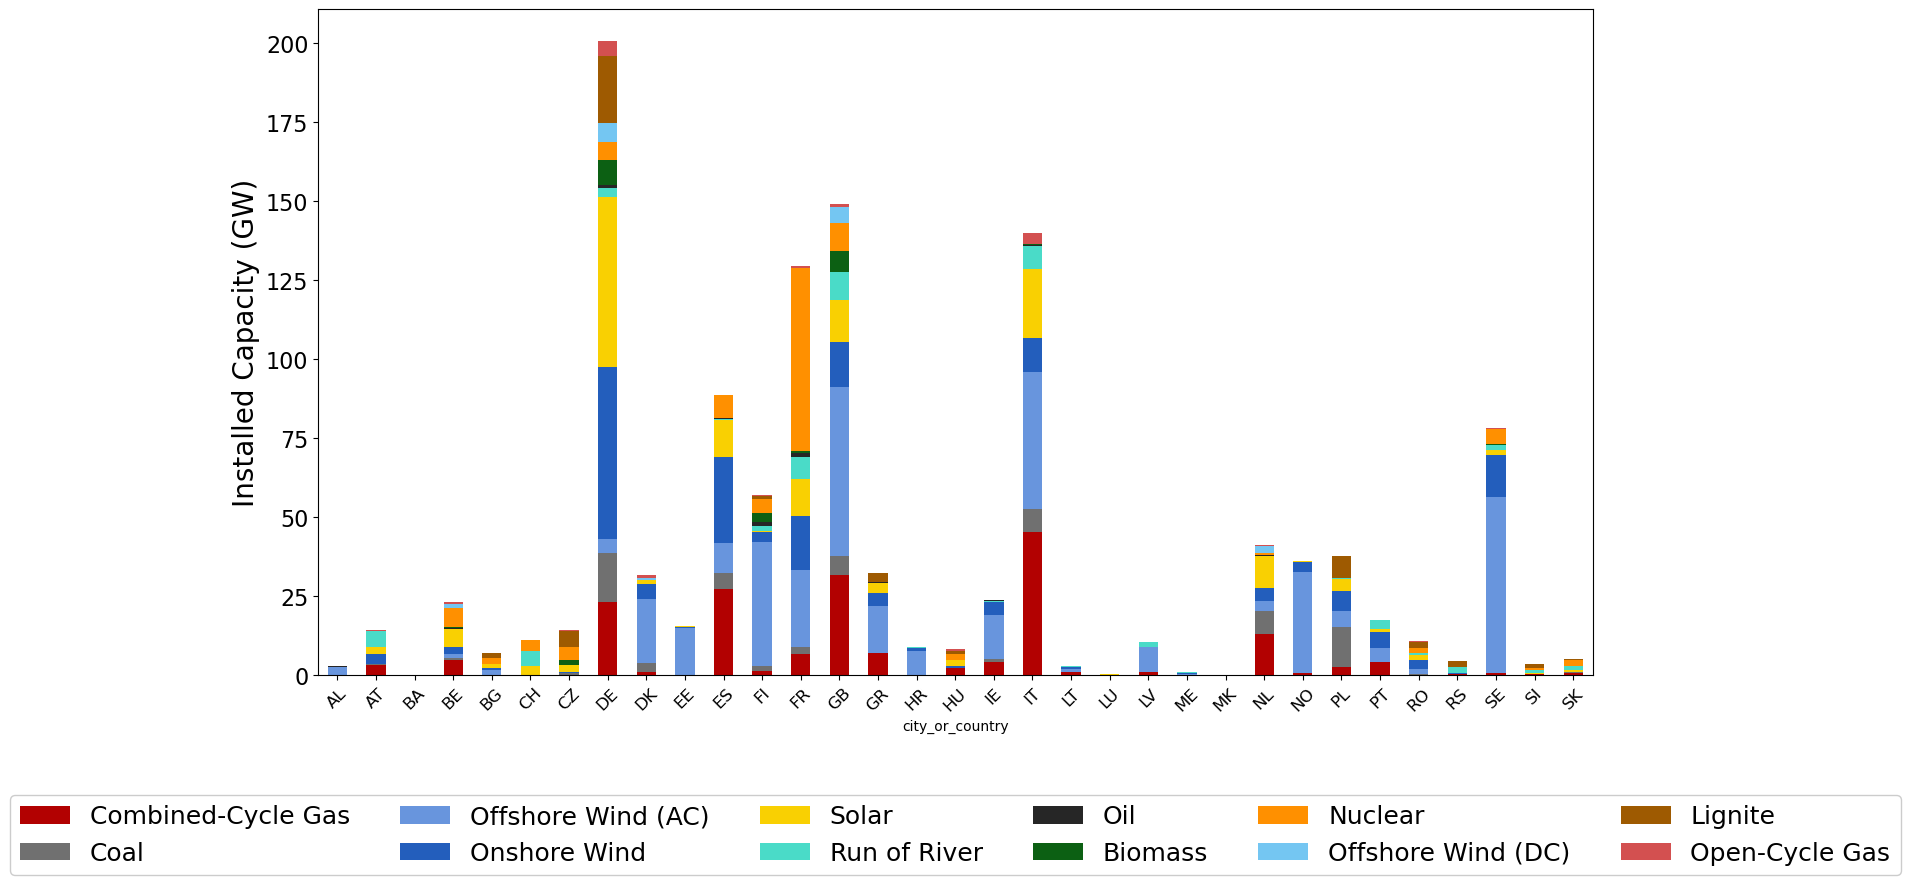

In [94]:
plotting.plot_installed_capacity_bar_chart(nodes, generators)

Generators by city and type effective capacity in GW


<Figure size 1800x900 with 0 Axes>

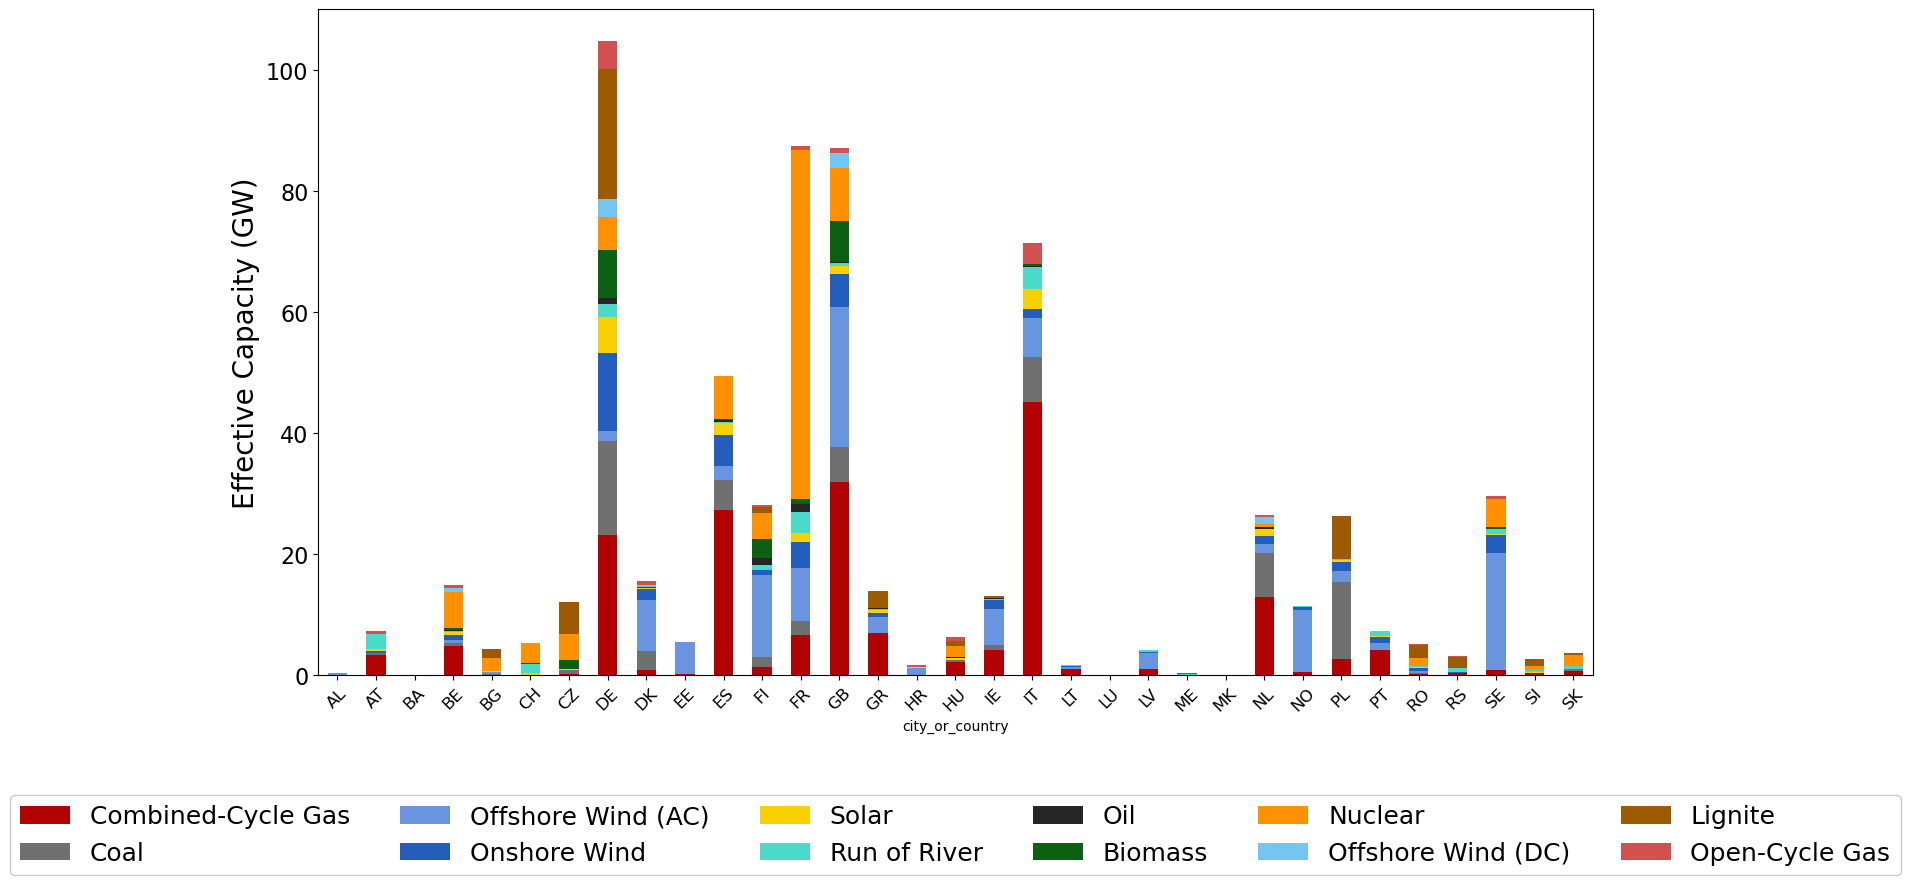

In [95]:
plotting.plot_effective_capacity_generators_bar_chart(
    nodes,
    generators,
    capacity_factors,
)

### Batteries

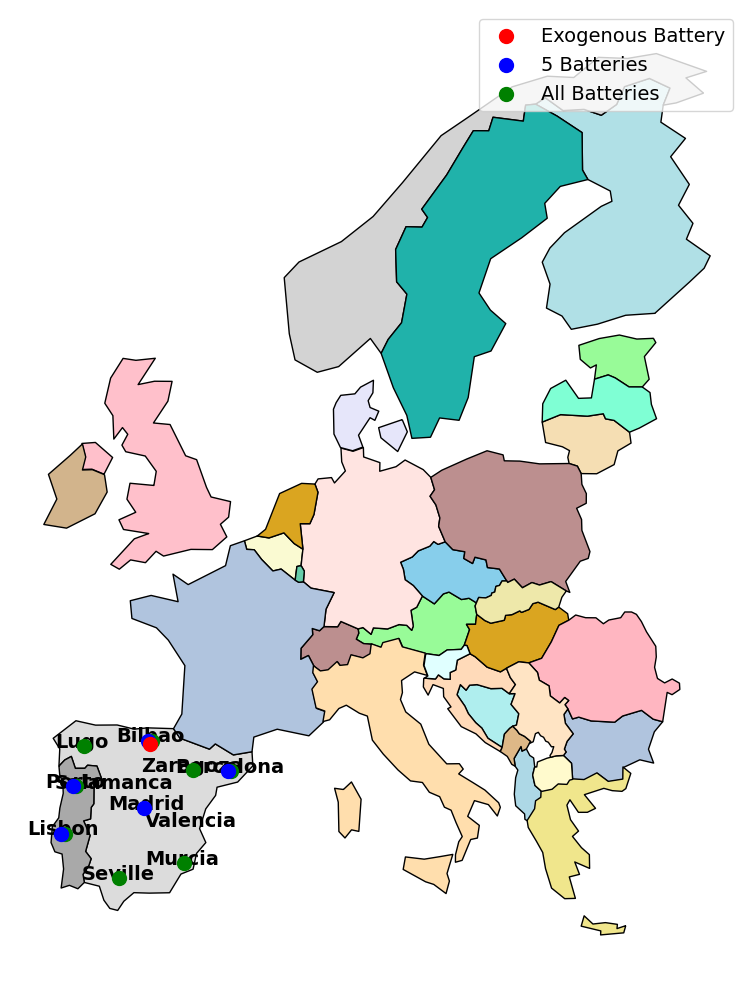

In [96]:
plotting.plot_battery_cases(nodes)

### Capacity Factors

In [97]:
# Extract unique carrier types from the column names
carrier_types = set(col.split()[-1] for col in capacity_factors.columns)
# Loop through each carrier type and compute the correlation matrix
for carrier in carrier_types:
    # Filter columns that contain the current carrier type
    carrier_columns = [col for col in capacity_factors.columns if col.endswith(carrier)]
print([" ".join(col.split()[:]) for col in carrier_columns])

['EE6 0 CCGT', 'GB5 0 CCGT', 'NL1 1 CCGT', 'IT1 11 CCGT', 'CZ1 0 CCGT', 'NL1 0 CCGT', 'IT1 1 CCGT', 'DE1 1 CCGT', 'GB0 4 CCGT', 'IT1 0 CCGT', 'ES1 8 CCGT', 'FR1 3 CCGT', 'DE1 0 CCGT', 'HU1 0 CCGT', 'GB0 11 CCGT', 'FR1 12 CCGT', 'GR1 0 CCGT', 'DE1 16 CCGT', 'IT1 3 CCGT', 'GB0 6 CCGT', 'FR1 13 CCGT', 'ES1 3 CCGT', 'GB0 10 CCGT', 'GB0 1 CCGT', 'FI2 0 CCGT', 'DE1 14 CCGT', 'LT6 0 CCGT', 'PT1 1 CCGT', 'HR1 0 CCGT', 'LV6 0 CCGT', 'GB0 8 CCGT', 'NL1 3 CCGT', 'IT1 8 CCGT', 'IT1 4 CCGT', 'SI1 0 CCGT', 'ES1 1 CCGT', 'FI2 1 CCGT', 'SE2 0 CCGT', 'RO1 1 CCGT', 'NL1 2 CCGT', 'IT1 5 CCGT', 'DK1 0 CCGT', 'BG1 0 CCGT', 'CH1 0 CCGT', 'RS1 0 CCGT', 'DE1 17 CCGT', 'FR1 7 CCGT', 'PL1 4 CCGT', 'IT1 7 CCGT', 'IT1 9 CCGT', 'ES4 0 CCGT', 'AT1 0 CCGT', 'BE1 1 CCGT', 'FR1 15 CCGT', 'DE1 4 CCGT', 'PL1 1 CCGT', 'IE5 0 CCGT', 'DE1 6 CCGT', 'SK1 0 CCGT', 'IT1 6 CCGT', 'DK2 0 CCGT', 'DE1 15 CCGT', 'FR1 10 CCGT', 'FR1 8 CCGT', 'IT1 2 CCGT', 'GB0 12 CCGT', 'ES1 0 CCGT', 'GB0 5 CCGT', 'DE1 9 CCGT', 'PL1 3 CCGT', 'DE1 5 

In [103]:
capacity_factors

AL1 0 offwind-ac  AL1 0 onwind  AL1 0 ror  AL1 0 solar  \
snapshot                                                                      
2013-01-01 00:00:00          0.002930      0.001468   0.274540          0.0   
2013-01-01 01:00:00          0.001872      0.000000   0.274515          0.0   
2013-01-01 02:00:00          0.000000      0.000000   0.274505          0.0   
2013-01-01 03:00:00          0.000000      0.000000   0.274627          0.0   
2013-01-01 04:00:00          0.000000      0.000000   0.274700          0.0   
...                               ...           ...        ...          ...   
2013-12-31 19:00:00          0.026572      0.024328   0.250162          0.0   
2013-12-31 20:00:00          0.029891      0.031360   0.250062          0.0   
2013-12-31 21:00:00          0.032750      0.034518   0.250067          0.0   
2013-12-31 22:00:00          0.028040      0.027423   0.250018          0.0   
2013-12-31 23:00:00          0.018277      0.020763   0.250010          0.0   

                     AT1 0 onwind  AT1 0 ror  AT1 0 solar  AT1 1 onwind  \
snapshot                                                                  
2013-01-01 00:00:00      0.024682   0.293430          0.0      0.174784   
2013-01-01 01:00:00      0.016699   0.293317          0.0      0.184360   
2013-01-01 02:00:00      0.012459   0.293226          0.0      0.184424   
2013-01-01 03:00:00      0.012660   0.293159          0.0      0.182823   
2013-01-01 04:00:00      0.013591   0.293112          0.0      0.171992   
...                           ...        ...          ...           ...   
2013-12-31 19:00:00      0.034577   0.359967          0.0      0.114026   
2013-12-31 20:00:00      0.042418   0.359713          0.0      0.125510   
2013-12-31 21:00:00      0.036139   0.359473          0.0      0.134289   
2013-12-31 22:00:00      0.036657   0.359223          0.0      0.131190   
2013-12-31 23:00:00      0.012115   0.358973          0.0      0.136378   

                     AT1 1 ror  AT1 1 solar  ...  GB0 2 CCGT  DE1 15 OCGT  \
snapshot                                     ...                            
2013-01-01 00:00:00   0.293430          0.0  ...         1.0          1.0   
2013-01-01 01:00:00   0.293317          0.0  ...         1.0          1.0   
2013-01-01 02:00:00   0.293226          0.0  ...         1.0          1.0   
2013-01-01 03:00:00   0.293159          0.0  ...         1.0          1.0   
2013-01-01 04:00:00   0.293112          0.0  ...         1.0          1.0   
...                        ...          ...  ...         ...          ...   
2013-12-31 19:00:00   0.359967          0.0  ...         1.0          1.0   
2013-12-31 20:00:00   0.359713          0.0  ...         1.0          1.0   
2013-12-31 21:00:00   0.359473          0.0  ...         1.0          1.0   
2013-12-31 22:00:00   0.359223          0.0  ...         1.0          1.0   
2013-12-31 23:00:00   0.358973          0.0  ...         1.0          1.0   

                     DE1 3 oil  SK1 0 nuclear  FR1 9 CCGT  CZ1 1 nuclear  \
snapshot                                                                   
2013-01-01 00:00:00        1.0            1.0         1.0            1.0   
2013-01-01 01:00:00        1.0            1.0         1.0            1.0   
2013-01-01 02:00:00        1.0            1.0         1.0            1.0   
2013-01-01 03:00:00        1.0            1.0         1.0            1.0   
2013-01-01 04:00:00        1.0            1.0         1.0            1.0   
...                        ...            ...         ...            ...   
2013-12-31 19:00:00        1.0            1.0         1.0            1.0   
2013-12-31 20:00:00        1.0            1.0         1.0            1.0   
2013-12-31 21:00:00        1.0            1.0         1.0            1.0   
2013-12-31 22:00:00        1.0            1.0         1.0            1.0   
2013-12-31 23:00:00        1.0            1.0         1.0            1.0   

                     IT1 6

Correlation Matrix for Ror Generators



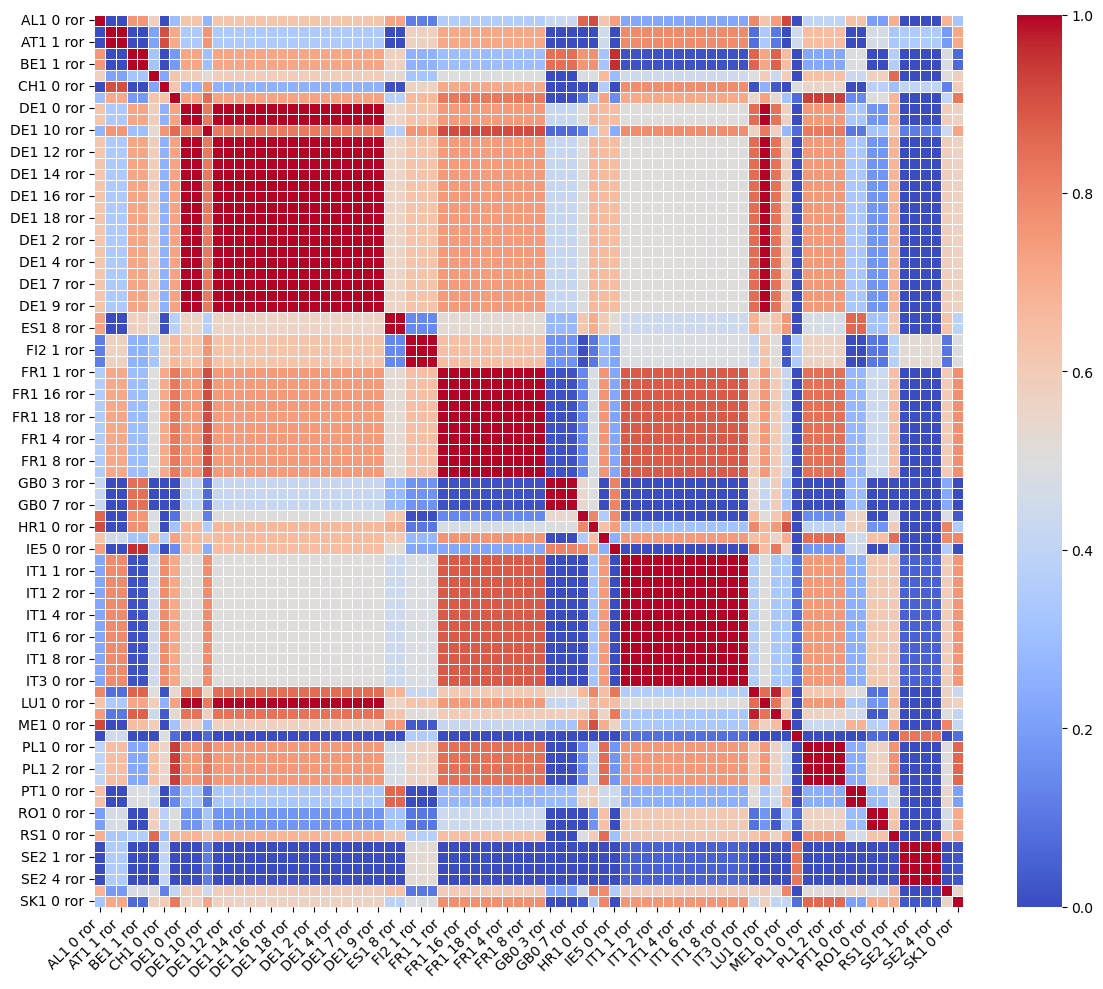

Correlation Matrix for Offwind-ac Generators



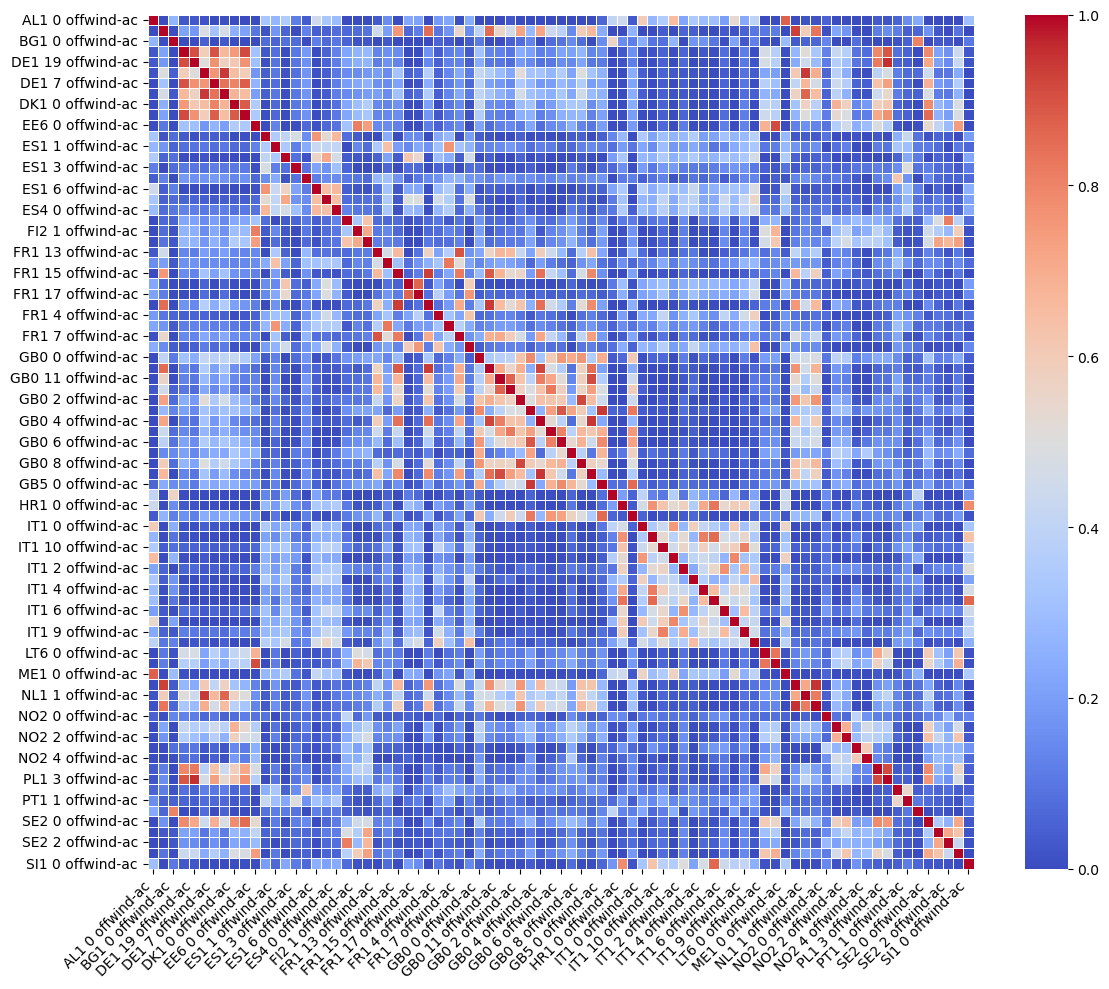

Correlation Matrix for Onwind Generators



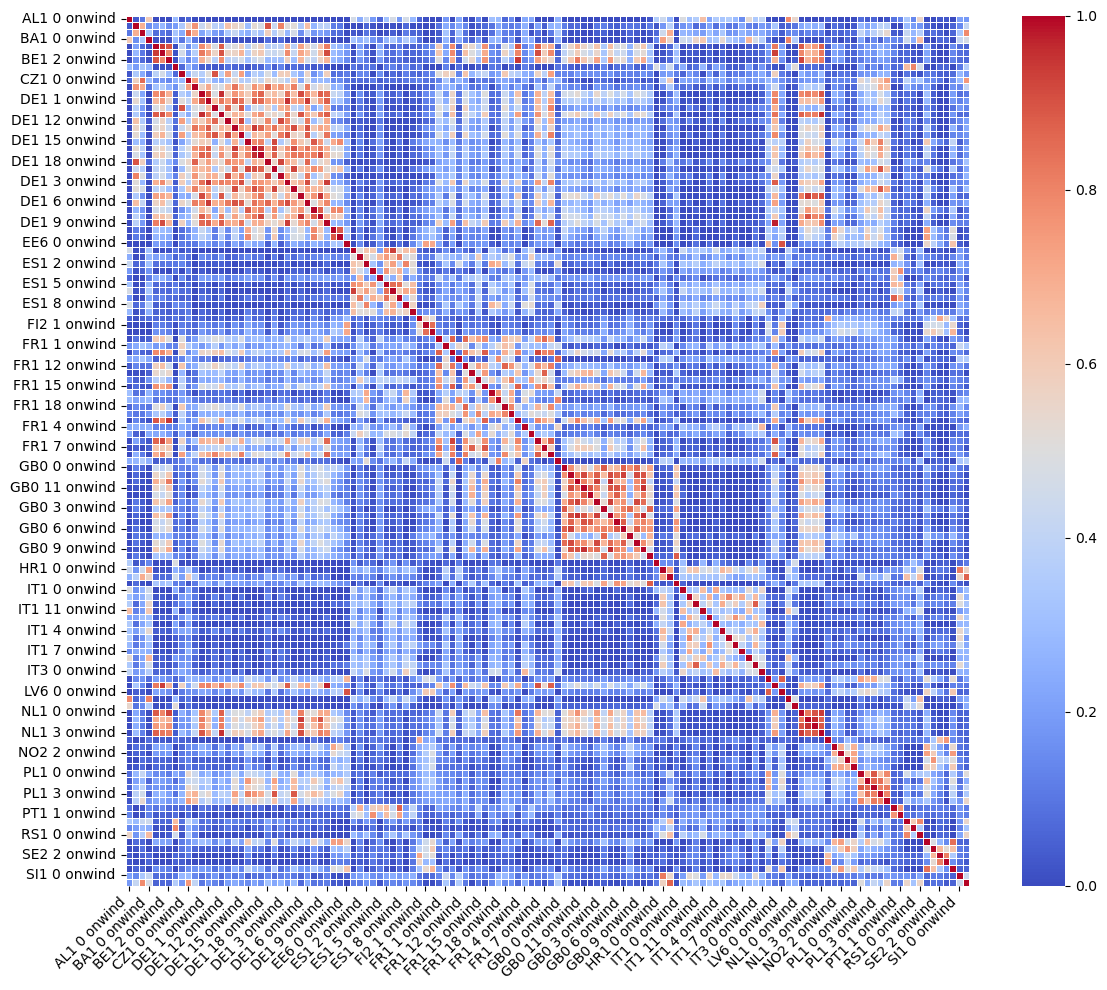

Correlation Matrix for Offwind-dc Generators



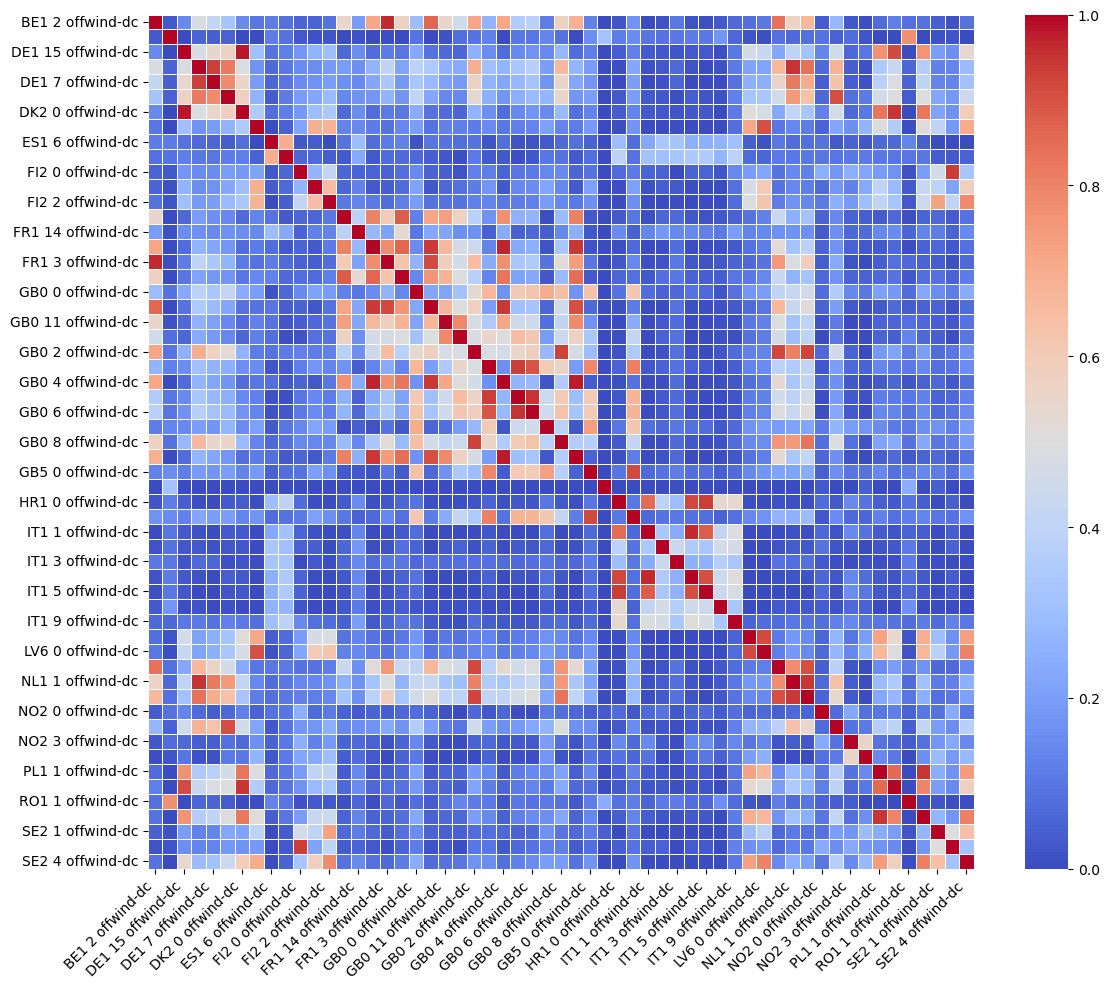

Correlation Matrix for Solar Generators



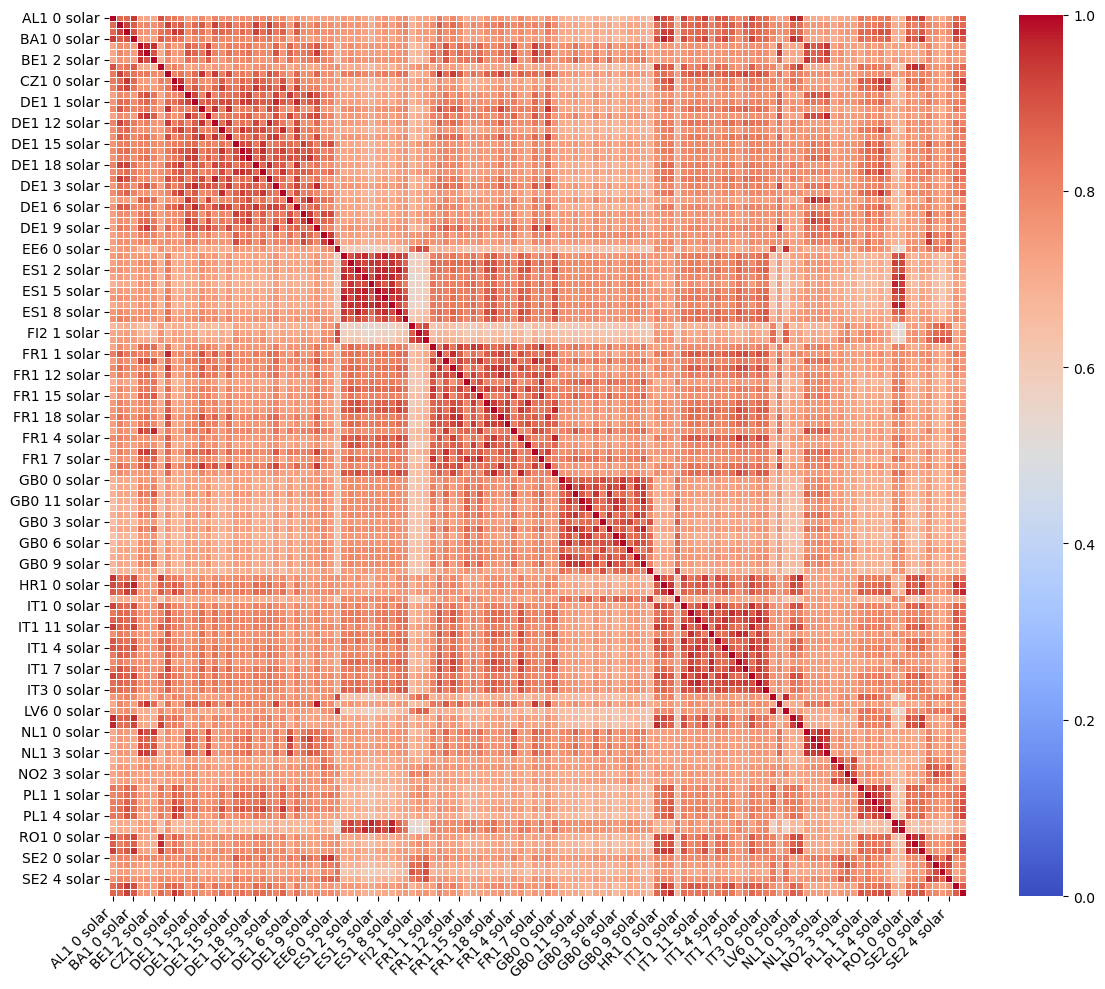

In [98]:
plotting.plot_correlation_matrix_carrier_by_carrier(
    capacity_factors, savefolder=capacity_factors_output_folder
)

Average Hourly Capacity Factors with ±1 standard deviation


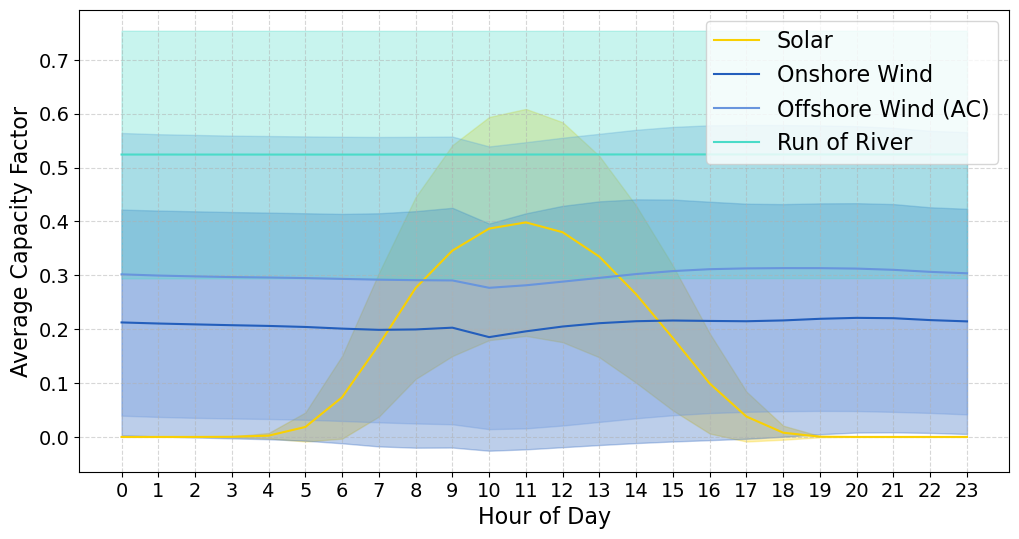

Average Monthly Capacity Factors with ±1 standard deviation


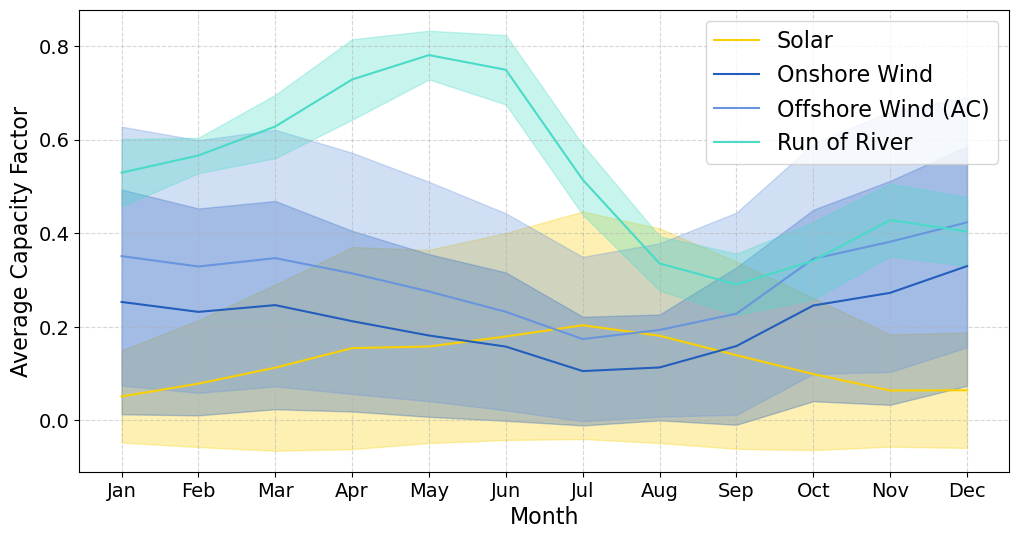

In [99]:
# Plot combined hourly and monthly averages.
plotting.plot_avg_hourly_capacity_factors(
    capacity_factors, generators, output_folder=capacity_factors_output_folder
)
plotting.plot_avg_monthly_capacity_factors(
    capacity_factors, generators, output_folder=capacity_factors_output_folder
)

Average Hourly Capacity Factors for solar with ±1 standard deviation


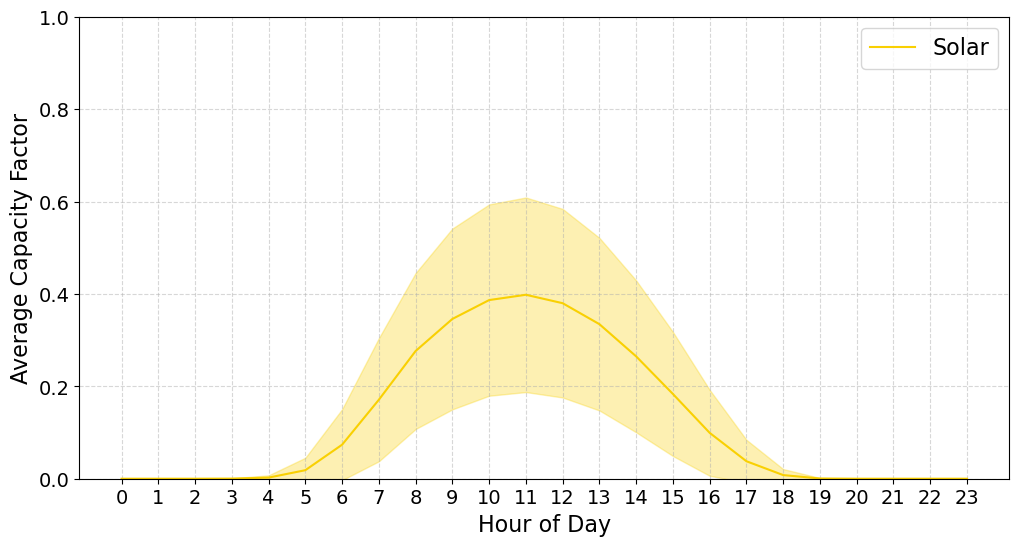

Average Hourly Capacity Factors for onwind with ±1 standard deviation


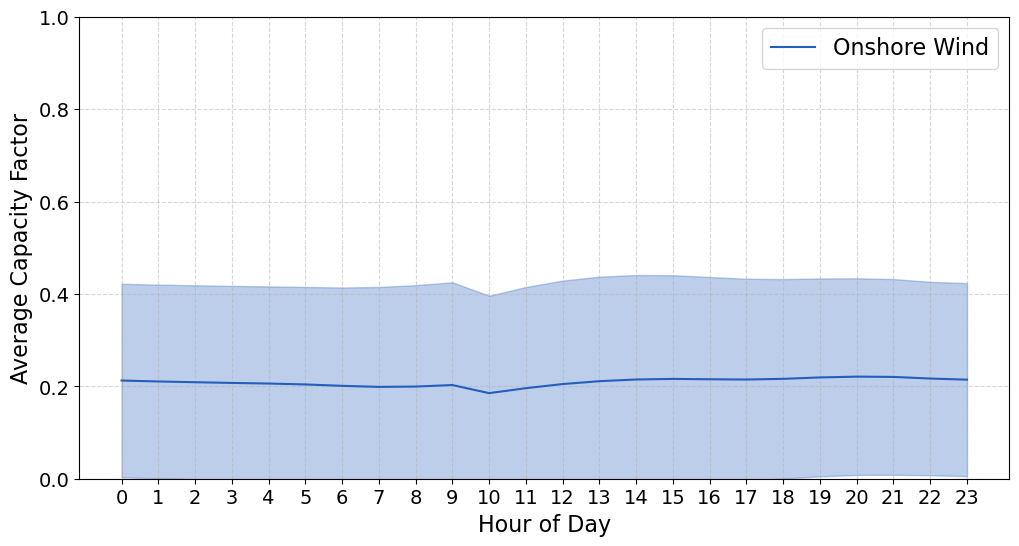

Average Hourly Capacity Factors for offwind-ac with ±1 standard deviation


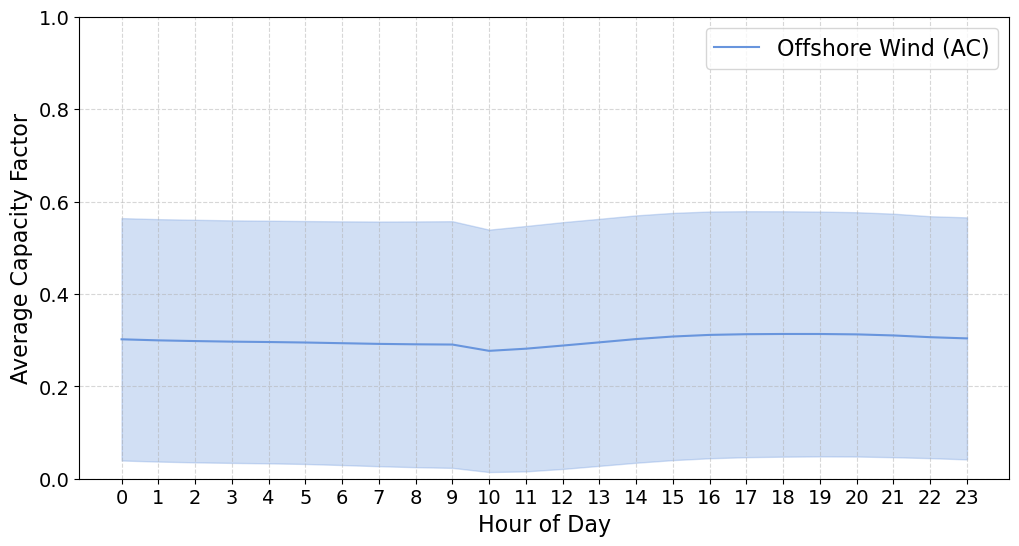

Average Hourly Capacity Factors for ror with ±1 standard deviation


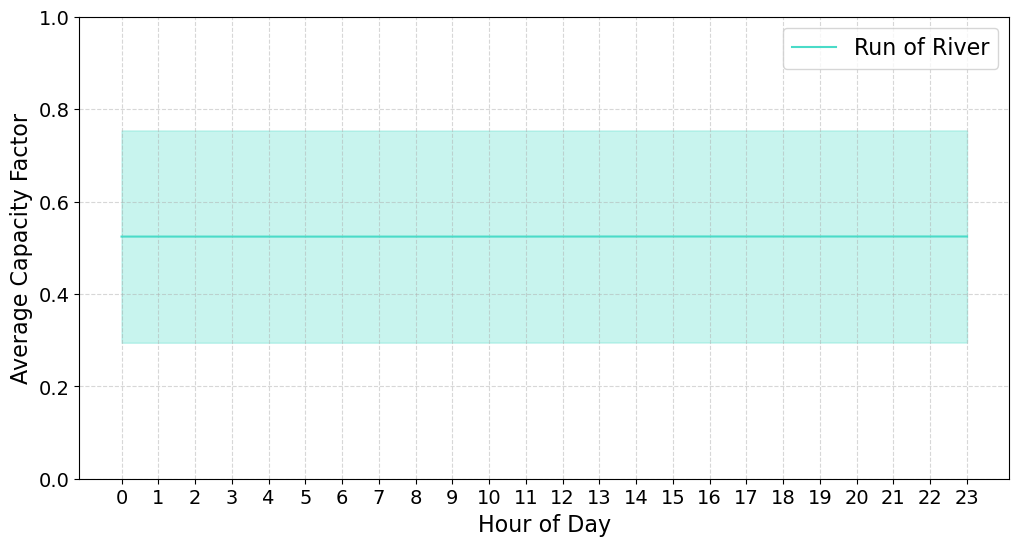

Average Monthly Capacity Factors for solar with ±1 standard deviation


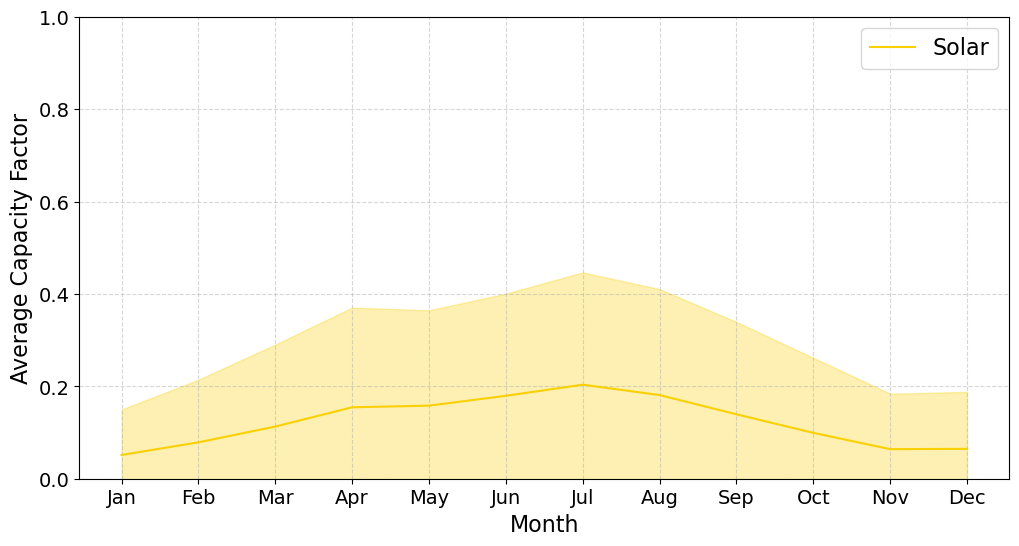

Average Monthly Capacity Factors for onwind with ±1 standard deviation


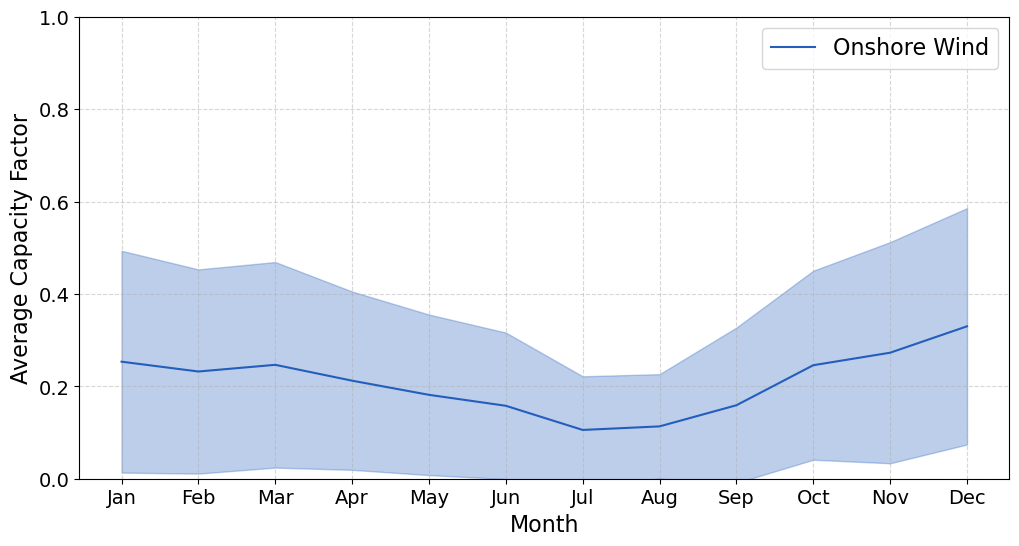

Average Monthly Capacity Factors for offwind-ac with ±1 standard deviation


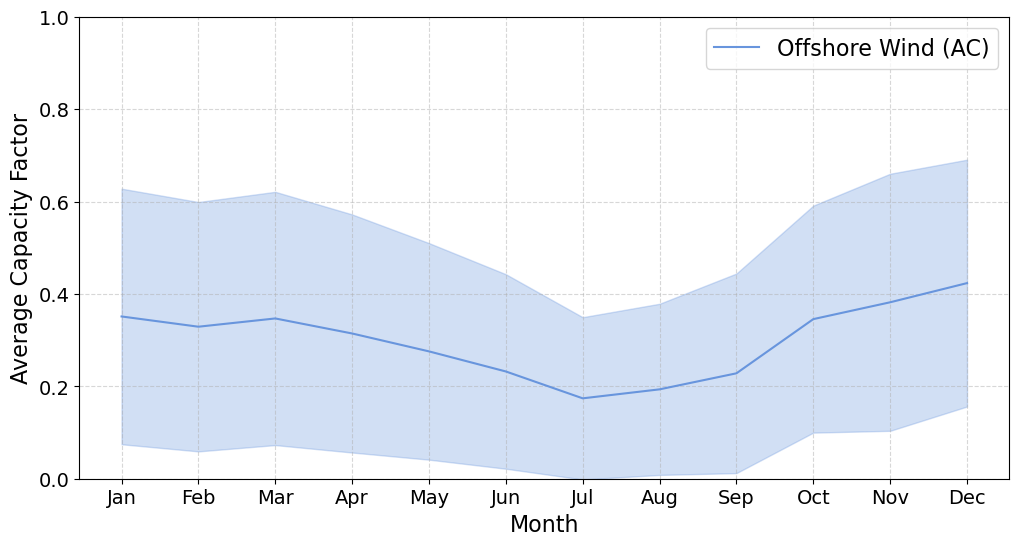

Average Monthly Capacity Factors for ror with ±1 standard deviation


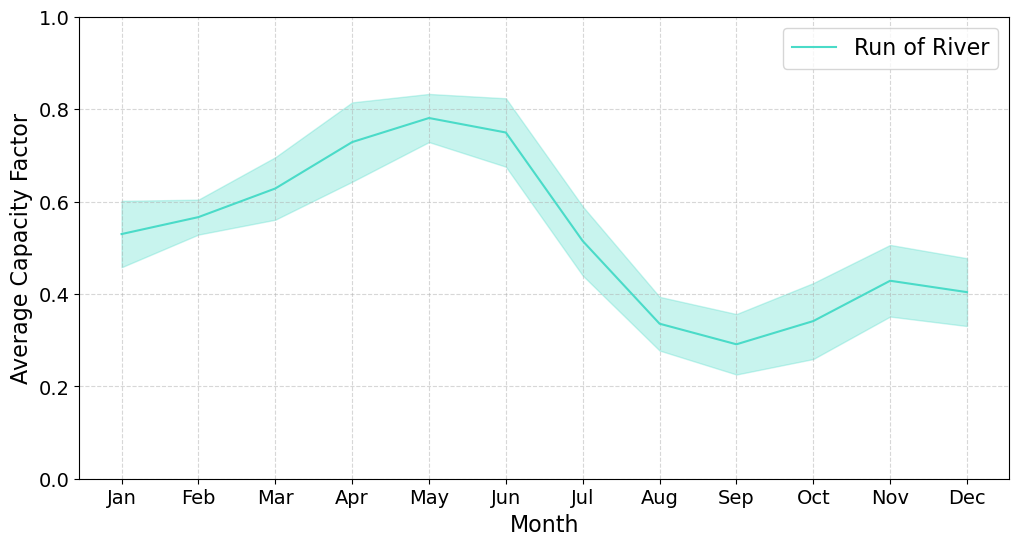

In [100]:
# Plot separate hourly and monthly figures for each generator type.
plotting.plot_avg_hourly_capacity_factors_sep(
    capacity_factors, generators, output_folder=capacity_factors_output_folder
)
plotting.plot_avg_monthly_capacity_factors_sep(
    capacity_factors, generators, output_folder=capacity_factors_output_folder
)

Heatmap of Solar capacity factors by hour of day and month


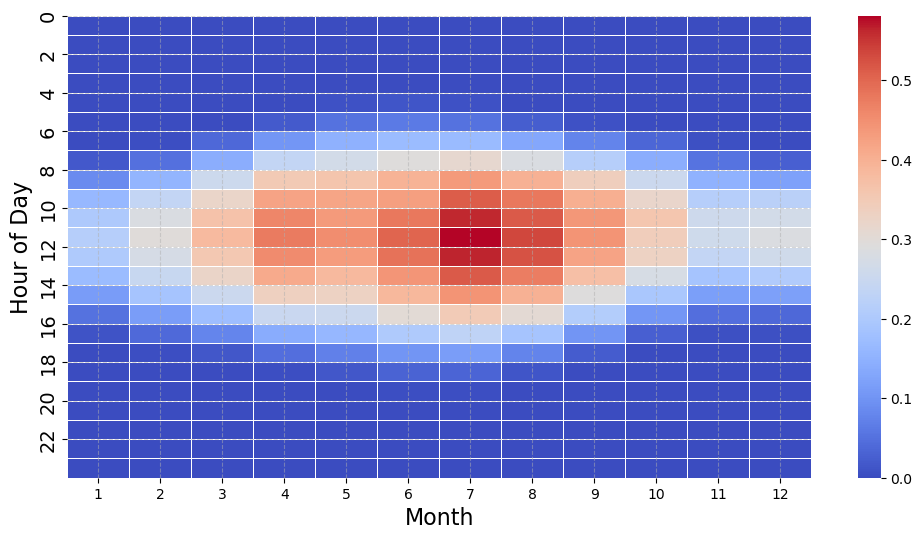

Heatmap of Onwind capacity factors by hour of day and month


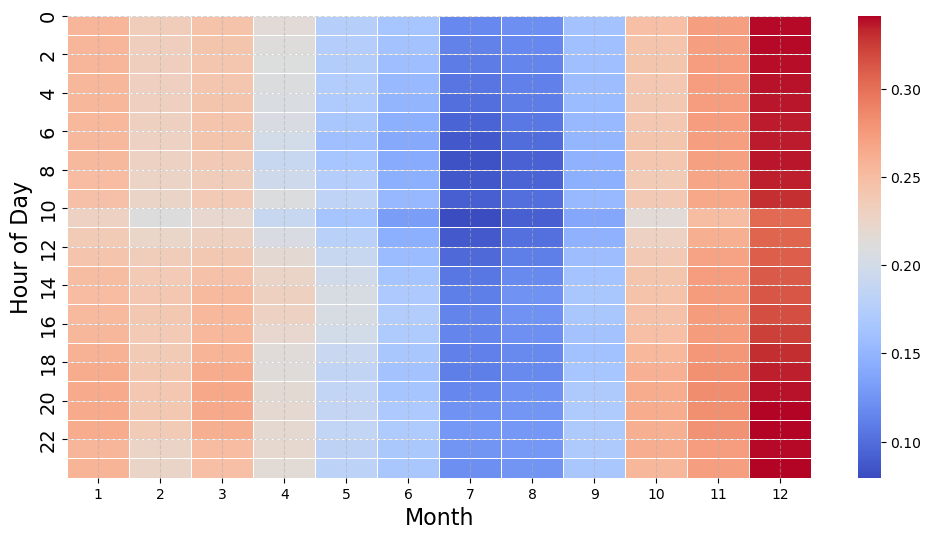

Heatmap of Offwind-ac capacity factors by hour of day and month


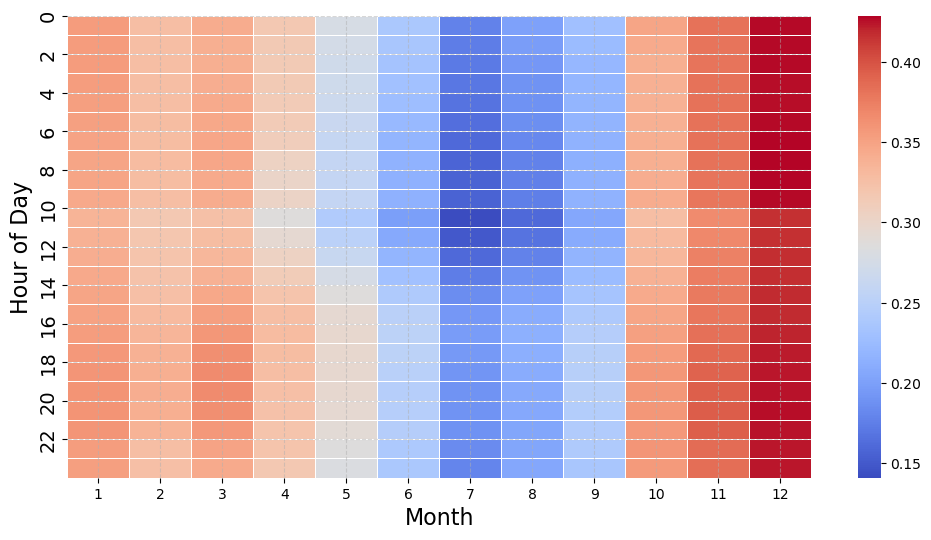

Heatmap of Ror capacity factors by hour of day and month


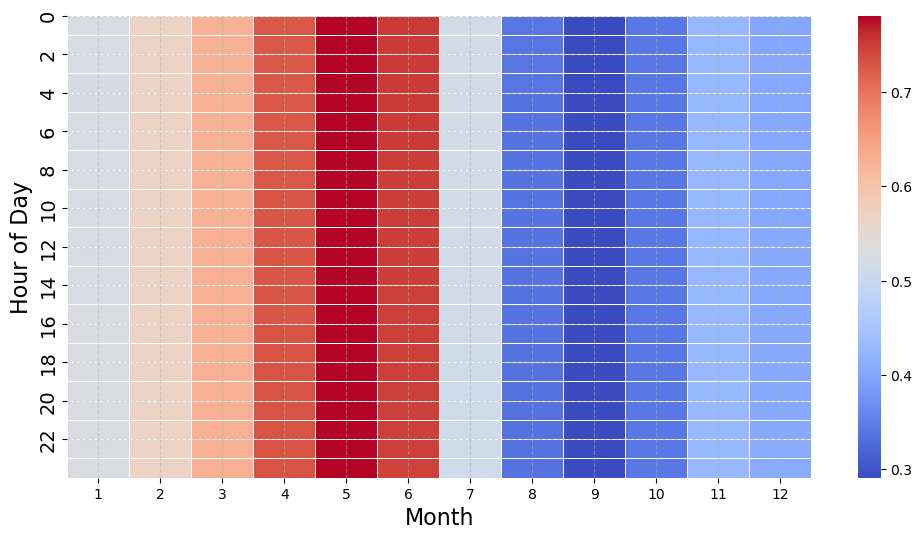

Average capacity factors by day of the week (aggregated over all generator types)


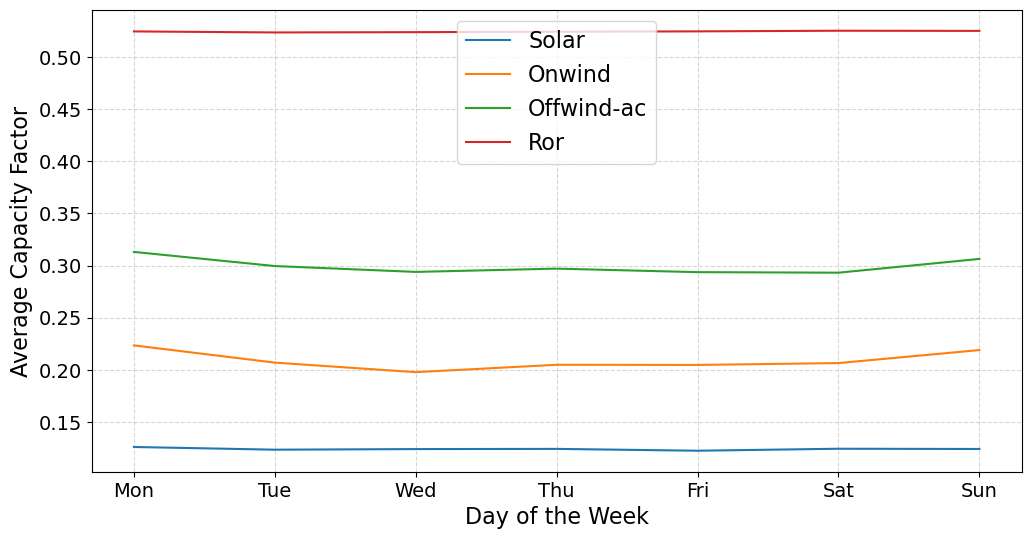

In [101]:
# Plot heatmaps and weekly averages.
plotting.plot_heatmap_capacity_factors(
    capacity_factors,
    use_global_limits=False,
    output_folder=capacity_factors_output_folder,
)
plotting.plot_avg_weekly_capacity_factors(
    capacity_factors,
    use_global_limits=False,
    output_folder=capacity_factors_output_folder,
)

Time series of capacity factors for all generator types with default axis scaling.


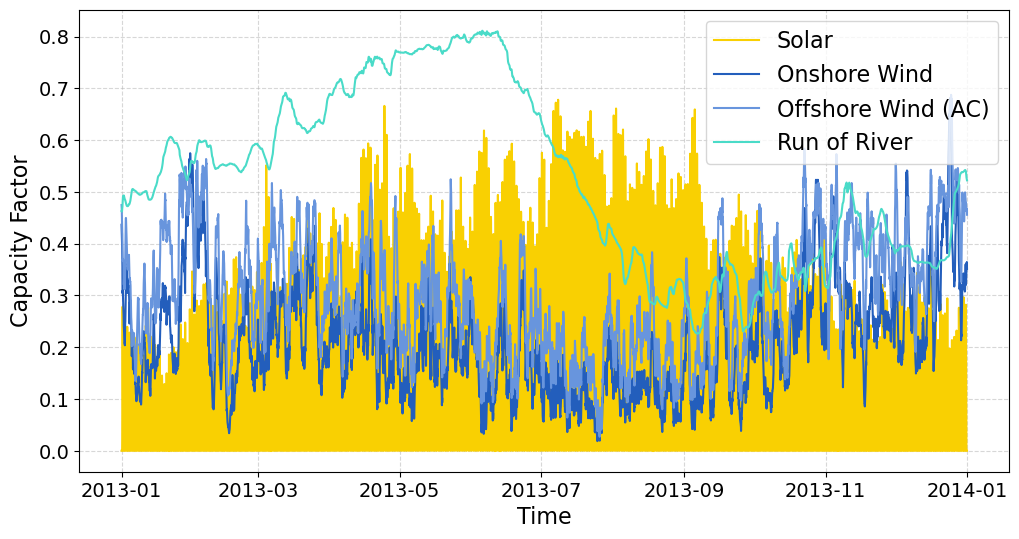

Time series of Solar capacity factors with default axis scaling.


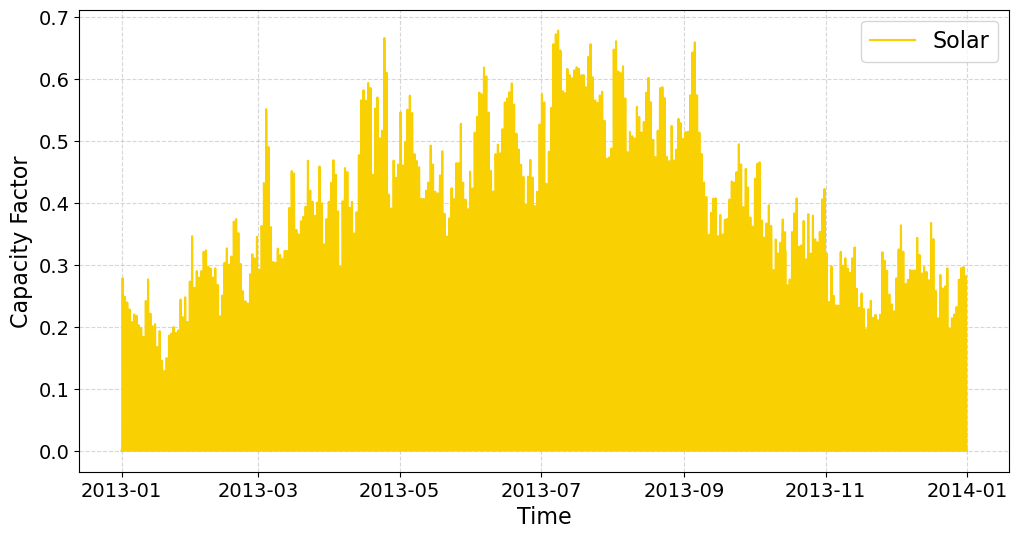

Time series of Onshore Wind capacity factors with default axis scaling.


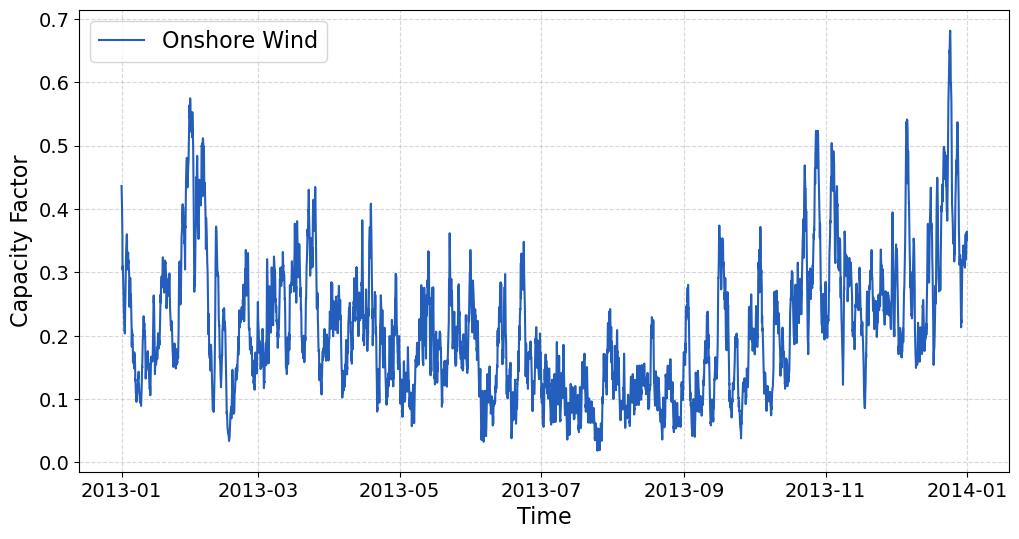

Time series of Offshore Wind (AC) capacity factors with default axis scaling.


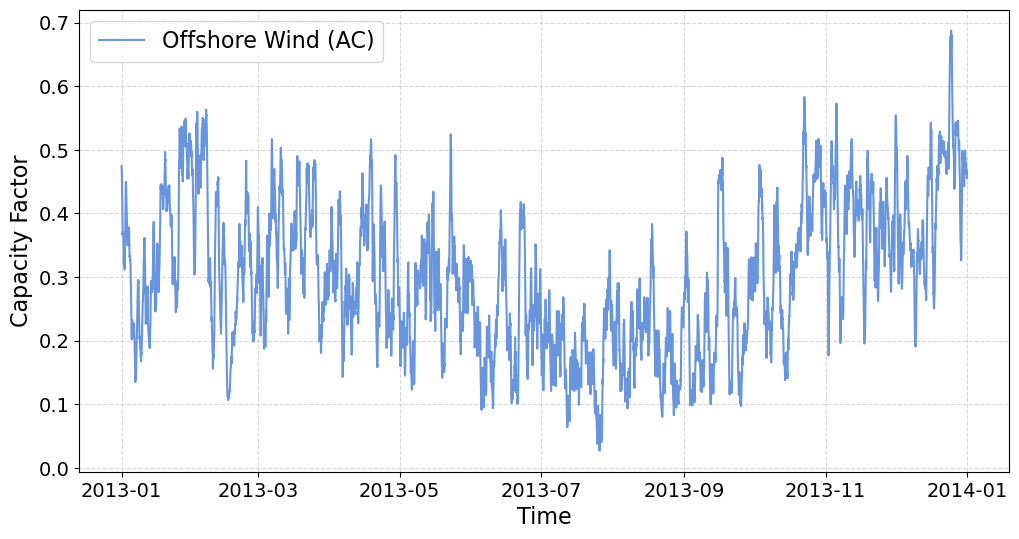

Time series of Run of River capacity factors with default axis scaling.


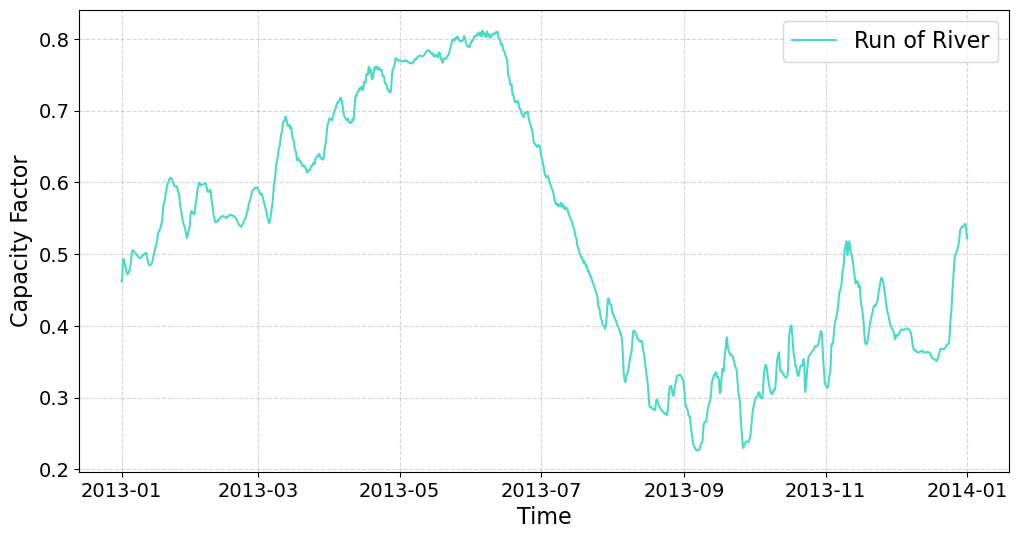

In [102]:
# Plot time series (combined and separate).
plotting.plot_timeseries_capacity_factors(
    capacity_factors,
    generators,
    use_global_limits=False,
    output_folder=capacity_factors_output_folder,
)
plotting.plot_timeseries_capacity_factors_sep(
    capacity_factors,
    generators,
    use_global_limits=False,
    output_folder=capacity_factors_output_folder,
)